In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

In [2]:
import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/runComparison.py:22: UserWarning: 
The generateDiffHtml method requires bokeh to be installed
but it is not needed to use the other methods in this class.
Run: pip install bokeh then restart your jupyter notebook kernel.
  warnings.warn('\n'+'The generateDiffHtml method requires bokeh to be installed'+'\n'+


## Set up and run the KNe metric. ## 

In [3]:
opsim = 'baseline_nexp2_v1.7.1_10yrs'
opsdb = maf.db.OpsimDatabase('/Users/lynnej/opsim/fbs_1.7.1/new_rolling/baseline_nexp2_v1.7.1_10yrs.db')

In [4]:
n_events = 10000 
slicer = maf.mafContrib.generateKNPopSlicer(n_events=n_events)

In [5]:
metric = maf.mafContrib.KNePopMetric()
summaryMetrics = [maf.SumMetric(metricName='Total detected'), 
                  maf.CountMetric(metricName='Total lightcurves in footprint'),
                  maf.CountMetric(metricName='Total lightcurves on sky', maskVal=0),
                  maf.MeanMetric(metricName='Fraction detected in footprint'), 
                  maf.MeanMetric(maskVal=0, metricName='Fraction detected of total')]

In [6]:
bundle = maf.MetricBundle(metric, slicer, None, runName=opsim, summaryMetrics=summaryMetrics)

In [7]:
outDir = 'test_kne'
bdict = {'kne': bundle}
g = maf.MetricBundleGroup(bdict, opsdb, outDir)

In [8]:
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'observationStartMJD', 'filter', 'night', 'fieldDec', 'fiveSigmaDepth'].
Found 2044984 visits
Running:  ['kne']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [9]:
bdict.keys()

dict_keys(['kne', 'KNePopMetric__blue_color_detect', 'KNePopMetric__multi_color_detect', 'KNePopMetric__multi_detect', 'KNePopMetric__red_color_detect', 'KNePopMetric__ztfrest_simple', 'KNePopMetric__ztfrest_simple_red'])

## Look at the metric outputs. ##

/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej

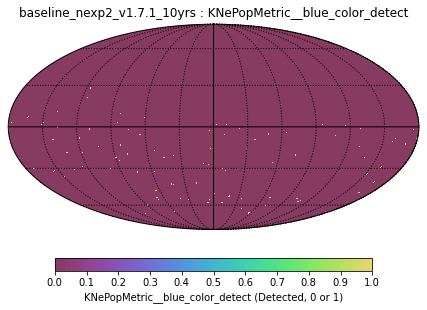

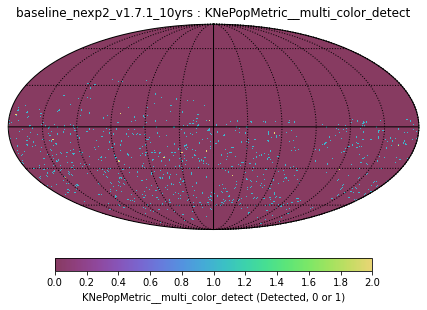

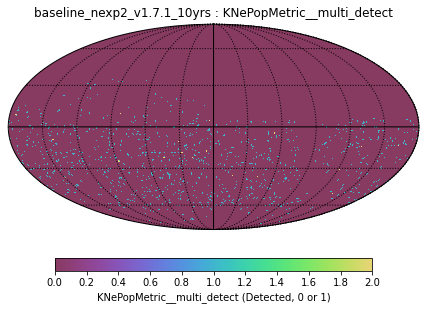

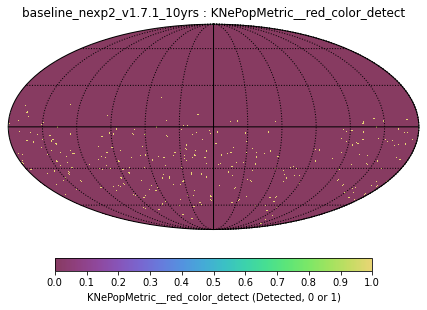

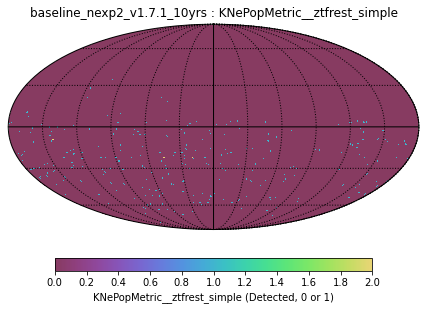

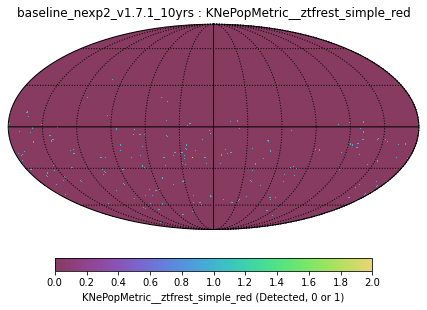

In [10]:
# If you don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64, 'colorMin': 0}
plotFunc = maf.plots.HealpixSkyMap()
ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
for k in bdict:
    if k.startswith('KN'):
        ph.setMetricBundles([bdict[k]])
        ph.plot(plotFunc=plotFunc, plotDicts=plotDict)

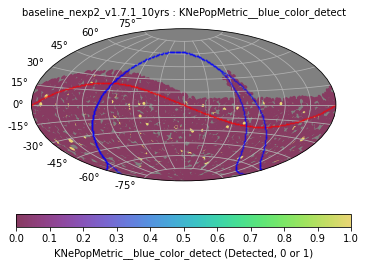

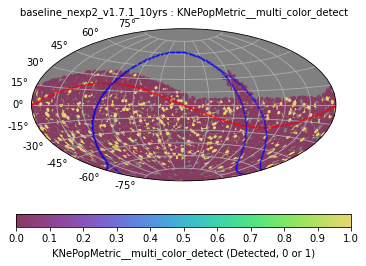

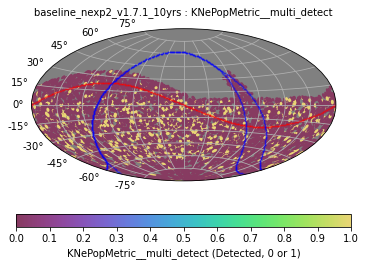

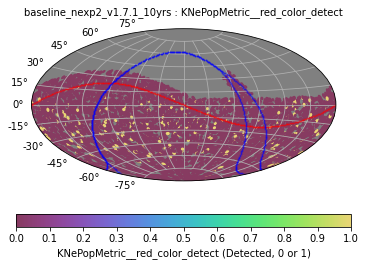

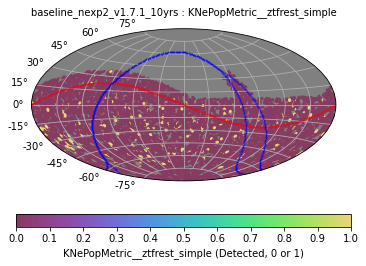

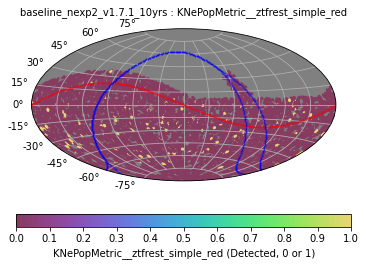

In [11]:
# If you do want to show each individual point - this is slower
plotFunc = maf.plots.BaseSkyMap()

ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
for k in bdict:
    if k.startswith('KN'):
        ph.setMetricBundles([bdict[k]])
        ph.plot(plotFunc=plotFunc)

In [12]:
for k in bdict:
    print(k, bdict[k].summaryValues)

kne {}
KNePopMetric__blue_color_detect {'Total detected': 102.0, 'Total lightcurves in footprint': 6719, 'Total lightcurves on sky': 10000, 'Fraction detected in footprint': 0.015180830480726298, 'Fraction detected of total': 0.0102}
KNePopMetric__multi_color_detect {'Total detected': 878.0, 'Total lightcurves in footprint': 6719, 'Total lightcurves on sky': 10000, 'Fraction detected in footprint': 0.1306742074713499, 'Fraction detected of total': 0.0878}
KNePopMetric__multi_detect {'Total detected': 1053.0, 'Total lightcurves in footprint': 6719, 'Total lightcurves on sky': 10000, 'Fraction detected in footprint': 0.1567197499627921, 'Fraction detected of total': 0.1053}
KNePopMetric__red_color_detect {'Total detected': 284.0, 'Total lightcurves in footprint': 6719, 'Total lightcurves on sky': 10000, 'Fraction detected in footprint': 0.042268194671826166, 'Fraction detected of total': 0.0284}
KNePopMetric__ztfrest_simple {'Total detected': 290.0, 'Total lightcurves in footprint': 6719

In [13]:
pd.DataFrame([bdict[k].summaryValues for k in bdict.keys() if k.startswith('KN')], 
             index=[k.replace('_', ' ') for k in bdict if k.startswith('KN')])

,Total detected,Total lightcurves in footprint,Total lightcurves on sky,Fraction detected in footprint,Fraction detected of total
KNePopMetric blue color detect,102.0,6719,10000,0.015181,0.0102
KNePopMetric multi color detect,878.0,6719,10000,0.130674,0.0878
KNePopMetric multi detect,1053.0,6719,10000,0.156720,0.1053
KNePopMetric red color detect,284.0,6719,10000,0.042268,0.0284
KNePopMetric ztfrest simple,290.0,6719,10000,0.043161,0.0290
KNePopMetric ztfrest simple red,191.0,6719,10000,0.028427,0.0191


In [14]:
# Illustrate some things about the metric values: (caught in summary metrics)
m = 'KNePopMetric__multi_detect'
print(f'How many lightcurves were added? (over the entire sky) {len(bdict[m].metricValues)}')
print(f'How many lightcurves were added in areas that were part of the survey footprint?' ,
      f'{len(bdict[m].metricValues.compressed())}')
print(f'What are the metric values for each of these light curves? '
      f'{np.unique(bdict[m].metricValues.compressed())}')
print(f'How many lightcurves were *successfully* detected? {bdict[m].metricValues.sum()}')
print(len(np.where(bdict[m].metricValues == 1)[0]))
frac_total = bdict[m].metricValues.sum() / len(bdict[m].metricValues)
print(f'Fraction of total lightcurves detected {frac_total}')
frac_footprint = bdict[m].metricValues.sum() / len(bdict[m].metricValues.compressed())
print(f'Fraction of lightcurves within footprint detected {frac_footprint}')

How many lightcurves were added? (over the entire sky) 10000
How many lightcurves were added in areas that were part of the survey footprint? 6719
What are the metric values for each of these light curves? [0. 1.]
How many lightcurves were *successfully* detected? 1053.0
1053
Fraction of total lightcurves detected 0.1053
Fraction of lightcurves within footprint detected 0.1567197499627921


## Look at the slicer information (how the lightcurves were added). ##

In [15]:
# The *slicer* keeps the information about the injected lightcurves too
print(f'How many lightcurves added over the sky? {len(bdict[m].slicer)}')

How many lightcurves added over the sky? 10000


/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of 

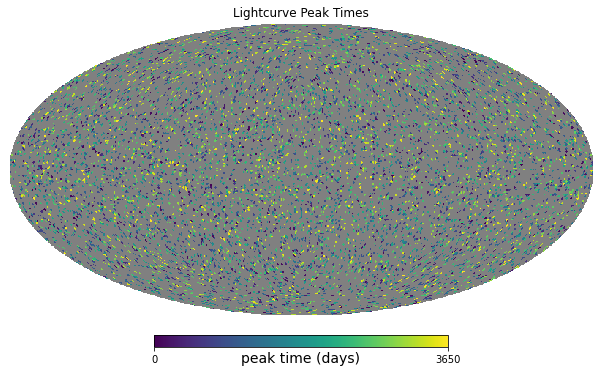

In [16]:
# Including their spatial, time and distance distribution
hp.mollview(rsUtils._healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], 
                             slicer.slicePoints['peak_time'], 64, reduceFunc=np.mean), 
            unit='peak time (days)', title='Lightcurve Peak Times', min=0, max=3650)

Text(0.5, 1.0, 'Distance distribution KNe')

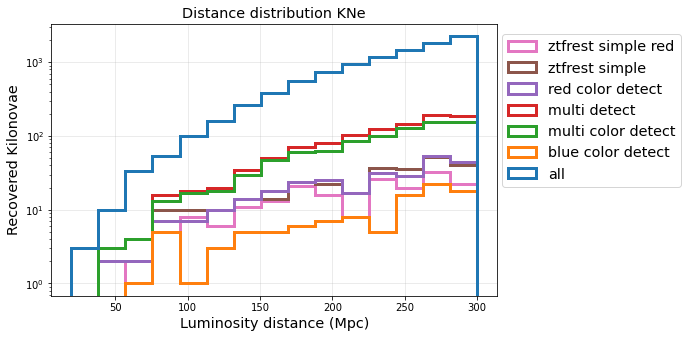

In [17]:
# And the distance distribution -- which we can also modify to show detected objects
distances = {}
distances['all'] = slicer.slicePoints['distance']
for k in bdict:
    if k.startswith('KN'):
        detected = np.where(bdict[k].metricValues == 1)
        distances[k] = distances['all'][detected]

plt.figure(figsize=(8, 5))
n,b,p = plt.hist([distances[k] for k in distances], 
                 label=[k.replace('_', ' ').replace('KNePopMetric  ', '') for k in distances], 
                 bins=15, histtype='step', linewidth=3, density=False, cumulative=False)
plt.xlabel("Luminosity distance (Mpc)", fontsize='x-large')
plt.ylabel("Recovered Kilonovae", fontsize='x-large')
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.legend(loc=(1.01, 0.4), fontsize='x-large', fancybox=True)
plt.title('Distance distribution KNe', fontsize='x-large')

Mean 0.1056544587330054 Min 0.011363636363636364 Max 0.20430107526881722 RMS 0.044632365181736126


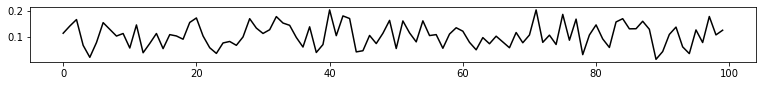

In [18]:
# The 'file_indx' in the slicePoint tracks which lightcurve (which file) was used for each point.
# So, with different input files we can check to see if there is a different fraction of objects detected.
indxes = np.unique(slicer.slicePoints['file_indx'])
detfraction = np.zeros(len(indxes))
for i, indx in enumerate(indxes):
    in_indx = np.where(slicer.slicePoints['file_indx'] == indx)[0]
    n_total = in_indx.size
    # This simply requires two detections, regardless of band
    detfraction[i] = bdict['KNePopMetric__multi_detect'].metricValues[in_indx].sum()/n_total

plt.figure(figsize=(13, 1))
plt.plot(indxes, detfraction, 'k-')
print(f'Mean {np.mean(detfraction)} Min {np.min(detfraction)} Max {np.max(detfraction)} RMS {np.std(detfraction)}')